HMM_622_Apple

In [2]:
pip install hmmlearn scikit-learn numpy scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


         1    9651.21817316             +nan
         2   15684.94446076   +6033.72628760
         3   16113.66138561    +428.71692484
         4   16367.78550208    +254.12411647
         5   16638.51019985    +270.72469778
         6   16924.03179509    +285.52159524
         7   17364.72560501    +440.69380992
         8   17809.88407863    +445.15847362
         9   17996.00379476    +186.11971613
        10   18101.09086607    +105.08707131
        11   18172.83750725     +71.74664117
        12   18239.09815820     +66.26065096
        13   18305.73295976     +66.63480156
        14   18380.86169946     +75.12873970
        15   18456.11257114     +75.25087169
        16   18526.96371046     +70.85113931
        17   18581.01730781     +54.05359736
        18   18620.41209632     +39.39478850
        19   18652.67557177     +32.26347545
        20   18678.00633374     +25.33076197
        21   18706.88574124     +28.87940750
        22   18754.17343759     +47.28769635
        23

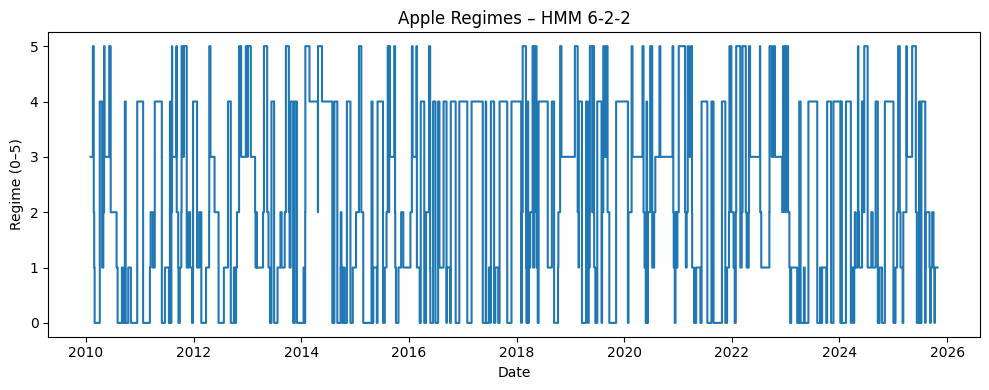

Transition Matrix (6×6):
[[0.901 0.044 0.011 0.    0.044 0.   ]
 [0.059 0.881 0.049 0.    0.01  0.   ]
 [0.011 0.086 0.81  0.004 0.    0.089]
 [0.    0.    0.005 0.956 0.    0.038]
 [0.046 0.004 0.002 0.    0.947 0.   ]
 [0.    0.015 0.064 0.04  0.004 0.877]]
State 0: [[0.00071 0.19665]
 [0.00209 0.21992]]
State 1: [[0.00061 0.23701]
 [0.0012  0.25639]]
State 2: [[-0.00301  0.32596]
 [ 0.00069  0.2893 ]]
State 3: [[ 5.3000e-04  7.4410e-01]
 [-1.0700e-03  4.4489e-01]]
State 4: [[0.0017  0.17329]
 [0.00075 0.14066]]
State 5: [[0.00225 0.31725]
 [0.00162 0.34026]]


In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
from hmmlearn.hmm import GMMHMM
import matplotlib.pyplot as plt
import numpy as np

#Load data
apple = pd.read_csv(r'Apple_clean.csv')
apple.columns = [c.strip().replace(' ', '_') for c in apple.columns]

apple['Date'] = pd.to_datetime(apple['Date'], errors='coerce')
apple = apple.dropna(subset=['Date'])
apple = apple.sort_values('Date')

close_col = 'Close' if 'Close' in apple.columns else apple.select_dtypes(float).columns[0]
apple['LogReturn'] = np.log(apple[close_col]).diff()
apple['Volatility'] = apple['LogReturn'].rolling(20).std() * np.sqrt(252)
apple = apple.dropna(subset=['LogReturn','Volatility']).reset_index(drop=True)

X = apple[['LogReturn','Volatility']].values
lengths = [len(X)]

# Khởi tạo mô hình HMM 6:2:2
model = GMMHMM(
    n_components=6,    
    n_mix=2,        
    covariance_type='diag',
    n_iter=200, tol=1e-3,
    random_state=42, verbose=True
)

# Huấn luyện
model.fit(X, lengths)

# Dự đoán chuỗi trạng thái ẩn
apple['Regime'] = model.predict(X)
plt.figure(figsize=(10,4))
plt.plot(apple['Date'], apple['Regime'], drawstyle='steps-post')
plt.title('Apple Regimes – HMM 6-2-2')
plt.xlabel('Date'); plt.ylabel('Regime (0–5)')
plt.tight_layout(); plt.show()
print("Transition Matrix (6×6):")
print(np.round(model.transmat_, 3))
for s in range(model.n_components):
    means = [model.means_[s][m] for m in range(model.n_mix)]
    print(f"State {s}: {np.round(means, 5)}")
apple.to_csv('apple_hmm622_regimes.csv', index=False)


HMM_712_Apple

Transition matrix (7x7):
[[0.179 0.453 0.    0.    0.023 0.345 0.   ]
 [0.164 0.    0.014 0.    0.822 0.    0.   ]
 [0.001 0.    0.248 0.494 0.188 0.069 0.   ]
 [0.    0.    0.913 0.061 0.    0.024 0.002]
 [0.    0.702 0.    0.    0.18  0.118 0.   ]
 [0.    0.    0.    0.882 0.    0.    0.118]
 [0.    0.    0.016 0.011 0.    0.026 0.947]]

Mixture means for feature = LogReturn (original units):
State 0: mix0=-0.014573, mix1=-0.006258
State 1: mix0=+0.005111, mix1=+0.002685
State 2: mix0=+0.006158, mix1=+0.008696
State 3: mix0=+0.004962, mix1=-0.002181
State 4: mix0=-0.002545, mix1=+0.006120
State 5: mix0=-0.015931, mix1=-0.134744
State 6: mix0=-0.004153, mix1=+0.088989

Time share per Regime (%):
Regime
0     2.84
1    22.71
2     7.79
3     7.41
4    23.26
5     2.91
6    33.08
Name: proportion, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_15600\3694202919.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu_scaled = float(model.means_[s][m])
C:\Users\Dell\AppData\Local\Temp\ipykernel_15600\3694202919.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu_scaled = float(model.means_[s][m])
C:\Users\Dell\AppData\Local\Temp\ipykernel_15600\3694202919.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu_scaled = float(model.means_[s][m])
C:\Users\Dell\Ap

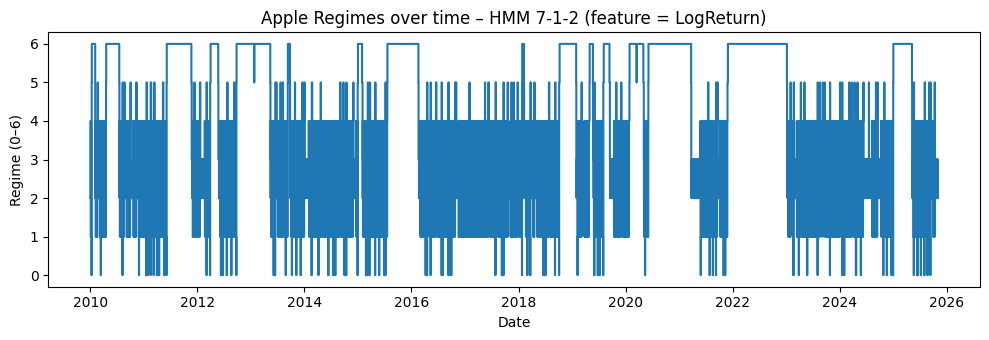

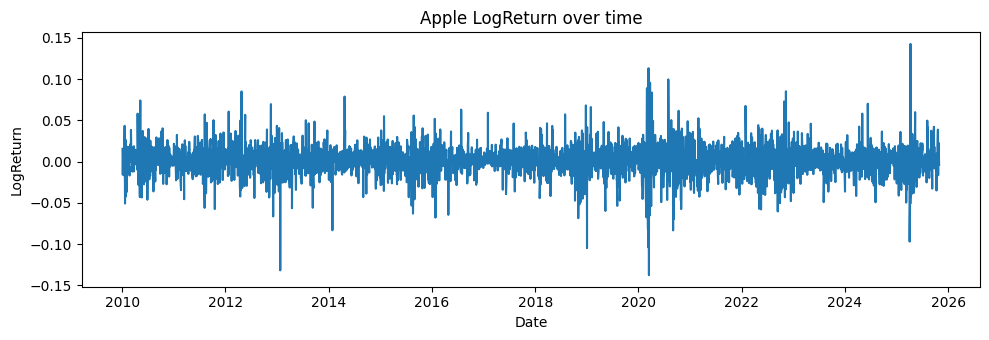

In [14]:
# Thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GMMHMM
from sklearn.preprocessing import StandardScaler
import os

# Load data
df = pd.read_csv(r'Apple_clean.csv')
df.columns = [c.strip().replace(' ', '_') for c in df.columns]

date_col = 'Date' if 'Date' in df.columns else [c for c in df.columns if 'date' in c.lower()][0]
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df = df.dropna(subset=[date_col]).sort_values(date_col).reset_index(drop=True)

close_candidates = ['Adj_Close','AdjClose','Close','close','Price','price']
close_col = None
for c in df.columns:
    if c in close_candidates or c.lower() in ['close','adj close','adj_close','price']:
        close_col = c; break
if close_col is None:
    close_col = df.select_dtypes(include=[np.number]).columns[0] 

# Tạo LogReturn và Volatility 
df['LogReturn'] = np.log(df[close_col]).diff()
df['Volatility'] = df['LogReturn'].rolling(20).std() * np.sqrt(252)
df = df.dropna(subset=['LogReturn']).reset_index(drop=True)
df.rename(columns={date_col: 'Date'}, inplace=True)

# CHỌN 1 FEATURE:
feature_name = 'LogReturn'          

X_raw = df[[feature_name]].values   
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)
lengths = [len(X)]

# HMM 7:1:2
model = GMMHMM(
    n_components=7,  
    n_mix=2,         
    covariance_type='diag',
    n_iter=300, tol=1e-3,
    random_state=42, verbose=False
)
model.fit(X, lengths)

# Dự đoán Regime
df['Regime'] = model.predict(X)

# Phân tích
print("Transition matrix (7x7):")
print(np.round(model.transmat_, 3))

# Means theo đơn vị gốc (1D)
print(f"\nMixture means for feature = {feature_name} (original units):")
for s in range(model.n_components):
    vals = []
    for m in range(model.n_mix):
        mu_scaled = float(model.means_[s][m])        
        mu_orig = scaler.inverse_transform([[mu_scaled]])[0,0]
        vals.append(mu_orig)
    print(f"State {s}: mix0={vals[0]:+.6f}, mix1={vals[1]:+.6f}")

# Tỷ trọng thời gian mỗi Regime
share = (df['Regime'].value_counts(normalize=True).sort_index()*100).round(2)
print("\nTime share per Regime (%):")
print(share)

# Vẽ biểu đồ
plt.figure(figsize=(10,3.5))
plt.plot(df['Date'], df['Regime'], drawstyle='steps-post')
plt.title(f'Apple Regimes over time – HMM 7-1-2 (feature = {feature_name})')
plt.xlabel('Date'); plt.ylabel('Regime (0–6)')
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,3.5))
plt.plot(df['Date'], df[feature_name])
plt.title(f'Apple {feature_name} over time')
plt.xlabel('Date'); plt.ylabel(feature_name)
plt.tight_layout(); plt.show()

out_path = os.path.join(os.path.dirname(r'Apple_clean.csv'), f'apple_hmm712_{feature_name.lower()}_regimes.csv')
df.to_csv(out_path, index=False)

HMM_622_Samsung

Transition matrix (6x6):
[[0.829 0.073 0.087 0.004 0.004 0.002]
 [0.086 0.879 0.007 0.    0.027 0.   ]
 [0.    0.    0.884 0.073 0.    0.043]
 [0.905 0.095 0.    0.    0.    0.   ]
 [0.    0.037 0.002 0.001 0.958 0.002]
 [0.    0.001 0.053 0.003 0.    0.943]]
State 0 mixture means (LogReturn, Volatility) in original units:
  - mix 0: [-0.00012, 0.2533]
  - mix 1: [-0.00032, 0.2710]
State 1 mixture means (LogReturn, Volatility) in original units:
  - mix 0: [+0.00110, 0.3080]
  - mix 1: [-0.00082, 0.2885]
State 2 mixture means (LogReturn, Volatility) in original units:
  - mix 0: [+0.00083, 0.2207]
  - mix 1: [-0.00174, 0.2384]
State 3 mixture means (LogReturn, Volatility) in original units:
  - mix 0: [-0.00331, 0.2524]
  - mix 1: [+0.04244, 0.2722]
State 4 mixture means (LogReturn, Volatility) in original units:
  - mix 0: [+0.00002, 0.3684]
  - mix 1: [+0.00396, 0.4754]
State 5 mixture means (LogReturn, Volatility) in original units:
  - mix 0: [+0.00092, 0.1952]
  - mix 1: [-0.00048

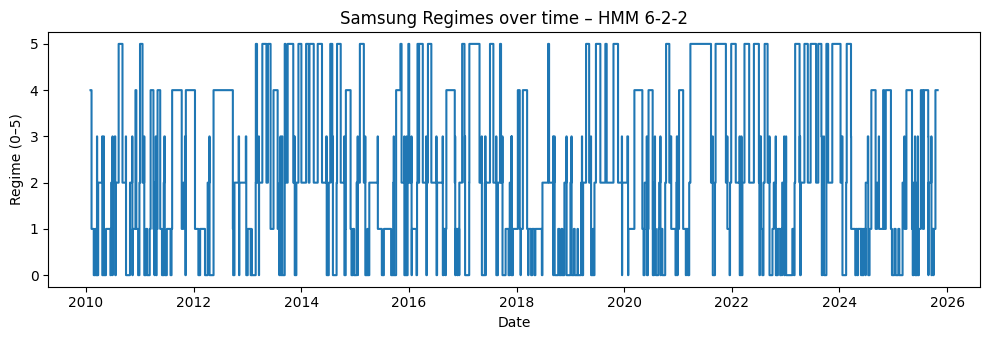

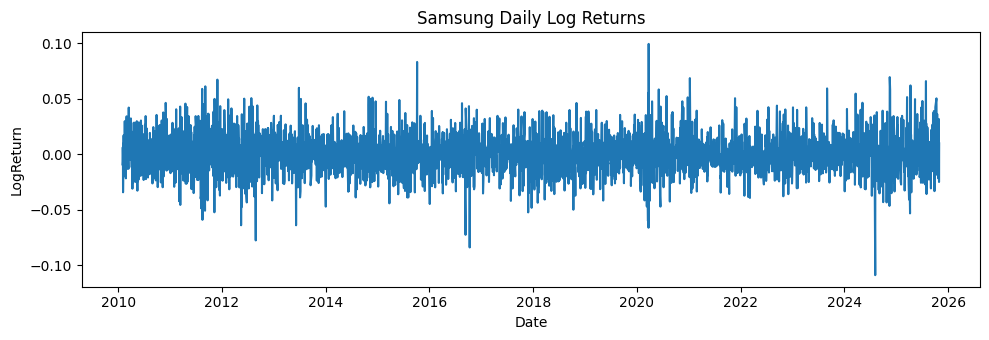

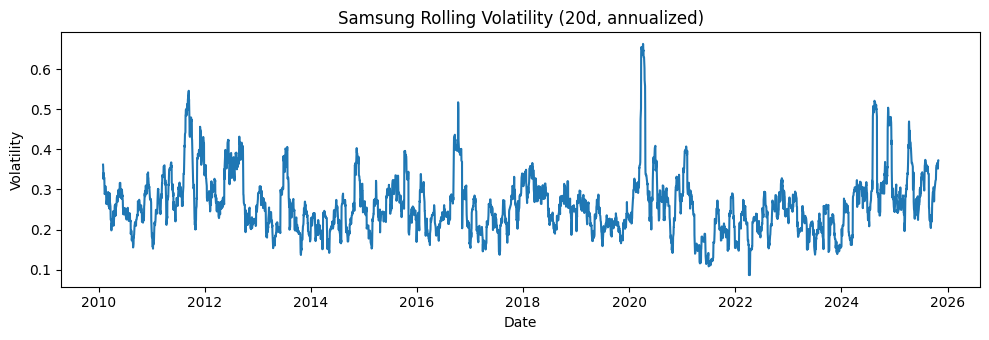

In [12]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GMMHMM
from sklearn.preprocessing import StandardScaler
import os

#Load data
df = pd.read_csv(r'Samsung_clean.csv')
df.columns = [c.strip().replace(' ', '_') for c in df.columns]

date_col = 'Date' if 'Date' in df.columns else [c for c in df.columns if 'date' in c.lower()][0]
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df = df.dropna(subset=[date_col]).sort_values(date_col).reset_index(drop=True)

close_candidates = ['Adj_Close','AdjClose','Close','close','Price','price']
close_col = None
for c in df.columns:
    if c in close_candidates or c.lower() in ['close','adj close','adj_close','price']:
        close_col = c; break
if close_col is None:
    close_col = df.select_dtypes(include=[np.number]).columns[0]  # fallback

# 2 features: LogReturn & Rolling Volatility (20d, annualized)
df['LogReturn'] = np.log(df[close_col]).diff()
df['Volatility'] = df['LogReturn'].rolling(20).std() * np.sqrt(252)
df = df.dropna(subset=['LogReturn','Volatility']).reset_index(drop=True)
df.rename(columns={date_col: 'Date'}, inplace=True)

X_raw = df[['LogReturn','Volatility']].values
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)   
lengths = [len(X)]

# HMM 6:2:2
model = GMMHMM(
    n_components=6,   
    n_mix=2,            
    covariance_type='diag',
    n_iter=200,
    tol=1e-3,
    random_state=42,
    verbose=False
)
model.fit(X, lengths)

df['Regime'] = model.predict(X)

print("Transition matrix (6x6):")
print(np.round(model.transmat_, 3))

# Means 
orig_means = []
for s in range(model.n_components):
    mix_means = []
    for m in range(model.n_mix):
        mu_scaled = model.means_[s][m]           
        mu_orig = scaler.inverse_transform(mu_scaled.reshape(1,-1)).ravel()
        mix_means.append(mu_orig)
    orig_means.append(mix_means)
    print(f"State {s} mixture means (LogReturn, Volatility) in original units:")
    for m, mu in enumerate(mix_means):
        print(f"  - mix {m}: [{mu[0]:+.5f}, {mu[1]:.4f}]")

share = (df['Regime'].value_counts(normalize=True).sort_index()*100).round(2)
summary = pd.DataFrame({'Regime': share.index, 'Share_%': share.values})
print("\nTime share per Regime (%):\n", summary)

# Vẽ biểu đồ
plt.figure(figsize=(10,3.5))
plt.plot(df['Date'], df['Regime'], drawstyle='steps-post')
plt.title('Samsung Regimes over time – HMM 6-2-2')
plt.xlabel('Date'); plt.ylabel('Regime (0–5)')
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,3.5))
plt.plot(df['Date'], df['LogReturn'])
plt.title('Samsung Daily Log Returns')
plt.xlabel('Date'); plt.ylabel('LogReturn')
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,3.5))
plt.plot(df['Date'], df['Volatility'])
plt.title('Samsung Rolling Volatility (20d, annualized)')
plt.xlabel('Date'); plt.ylabel('Volatility')
plt.tight_layout(); plt.show()

# Lưu kết quả
out_path = os.path.join(os.path.dirname(r'Samsung_clean.csv'), 'samsung_hmm622_regimes.csv')
df.to_csv(out_path, index=False)

HMM_712_Samsung

Transition matrix (7x7):
[[0.007 0.    0.    0.    0.    0.    0.993]
 [0.    0.    0.955 0.045 0.    0.    0.   ]
 [0.    0.002 0.174 0.645 0.179 0.    0.   ]
 [0.    0.11  0.863 0.021 0.005 0.    0.   ]
 [0.    0.467 0.022 0.152 0.108 0.    0.251]
 [0.991 0.    0.001 0.009 0.    0.    0.   ]
 [0.    0.006 0.    0.    0.009 0.968 0.017]]

Mixture means for feature = LogReturn (original units):
State 0: mix0=-0.000474, mix1=-0.002612
State 1: mix0=+0.009711, mix1=+0.020035
State 2: mix0=+0.007204, mix1=-0.011248
State 3: mix0=-0.011397, mix1=+0.008064
State 4: mix0=+0.038287, mix1=-0.000127
State 5: mix0=+0.003790, mix1=-0.003373
State 6: mix0=+0.001869, mix1=+0.002920

Time share per Regime (%):
Regime
0    30.22
1     0.77
2     3.70
3     2.80
4     1.36
5    30.35
6    30.79
Name: proportion, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_15600\4155890288.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu_scaled = float(model.means_[s][m])
C:\Users\Dell\AppData\Local\Temp\ipykernel_15600\4155890288.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu_scaled = float(model.means_[s][m])
C:\Users\Dell\AppData\Local\Temp\ipykernel_15600\4155890288.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu_scaled = float(model.means_[s][m])
C:\Users\Dell\Ap

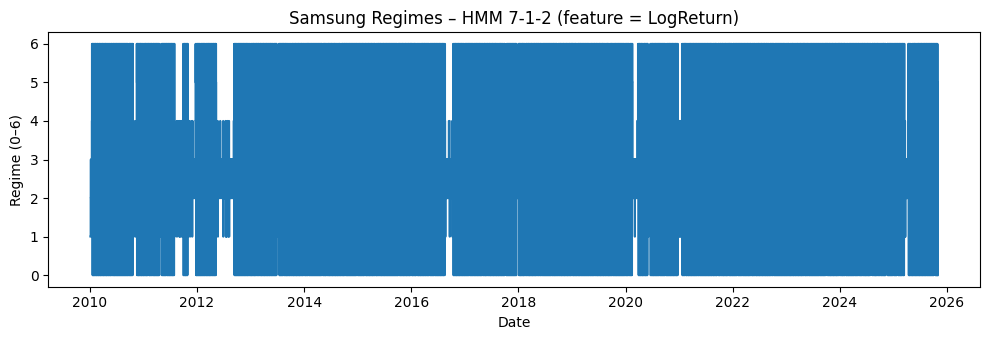

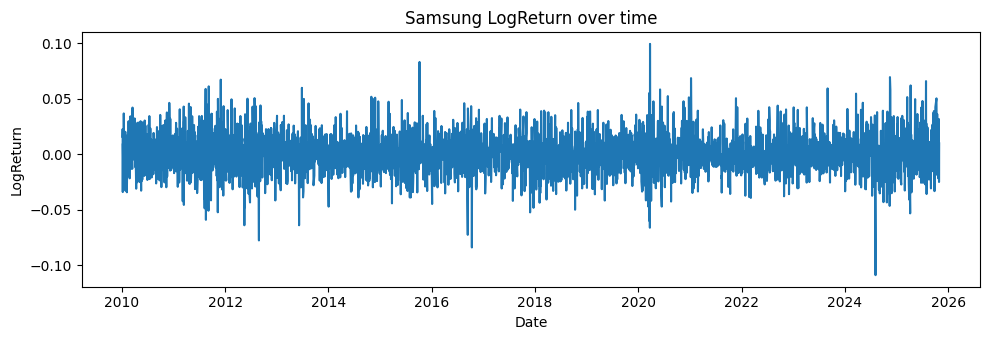

In [15]:
# Thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GMMHMM
from sklearn.preprocessing import StandardScaler
import os

# Load data
df = pd.read_csv(r'Samsung_clean.csv')
df.columns = [c.strip().replace(' ', '_') for c in df.columns]

date_col = 'Date' if 'Date' in df.columns else [c for c in df.columns if 'date' in c.lower()][0]
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df = df.dropna(subset=[date_col]).sort_values(date_col).reset_index(drop=True)

close_candidates = ['Adj_Close','AdjClose','Close','close','Price','price']
close_col = None
for c in df.columns:
    if c in close_candidates or c.lower() in ['close','adj close','adj_close','price']:
        close_col = c; break
if close_col is None:
    close_col = df.select_dtypes(include=[np.number]).columns[0] 

# Tạo LogReturn + Volatility 
df['LogReturn'] = np.log(df[close_col]).diff()
df['Volatility'] = df['LogReturn'].rolling(20).std() * np.sqrt(252)
df = df.dropna(subset=['LogReturn']).reset_index(drop=True)
df.rename(columns={date_col: 'Date'}, inplace=True)

# Chọn 1 feature
feature_name = 'LogReturn'          

X_raw = df[[feature_name]].values  
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)
lengths = [len(X)]

#HMM 7:1:2
model = GMMHMM(
    n_components=7,  
    n_mix=2,        
    covariance_type='diag',
    n_iter=300, tol=1e-3,
    random_state=42, verbose=False
)
model.fit(X, lengths)
df['Regime'] = model.predict(X)

# Phân tích
import numpy as np
print("Transition matrix (7x7):")
print(np.round(model.transmat_, 3))

print(f"\nMixture means for feature = {feature_name} (original units):")
for s in range(model.n_components):
    vals = []
    for m in range(model.n_mix):
        mu_scaled = float(model.means_[s][m])  
        mu_orig = scaler.inverse_transform([[mu_scaled]])[0,0]
        vals.append(mu_orig)
    print(f"State {s}: mix0={vals[0]:+.6f}, mix1={vals[1]:+.6f}")

share = (df['Regime'].value_counts(normalize=True).sort_index()*100).round(2)
print("\nTime share per Regime (%):")
print(share)

#Vẽ biểu đồ
plt.figure(figsize=(10,3.5))
plt.plot(df['Date'], df['Regime'], drawstyle='steps-post')
plt.title(f'Samsung Regimes – HMM 7-1-2 (feature = {feature_name})')
plt.xlabel('Date'); plt.ylabel('Regime (0–6)')
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,3.5))
plt.plot(df['Date'], df[feature_name])
plt.title(f'Samsung {feature_name} over time')
plt.xlabel('Date'); plt.ylabel(feature_name)
plt.tight_layout(); plt.show()

out_path = os.path.join(os.path.dirname(r'Samsung_clean.csv'), f'samsung_hmm712_{feature_name.lower()}_regimes.csv')
df.to_csv(out_path, index=False)


HMM_622_Xiaomi

Transition matrix (6x6):
[[0.012 0.    0.    0.672 0.316 0.   ]
 [0.    0.919 0.    0.015 0.066 0.   ]
 [0.009 0.    0.    0.    0.    0.991]
 [0.071 0.    0.029 0.878 0.    0.022]
 [0.    0.009 0.    0.043 0.948 0.   ]
 [0.058 0.    0.718 0.    0.    0.224]]

State 0 mixture means (LogReturn, Volatility) in original units:
  - mix 0: [+0.01215, 0.4723]
  - mix 1: [+0.01641, 0.3858]

State 1 mixture means (LogReturn, Volatility) in original units:
  - mix 0: [-0.00410, 0.7809]
  - mix 1: [+0.00508, 1.0429]

State 2 mixture means (LogReturn, Volatility) in original units:
  - mix 0: [-0.00466, 0.3513]
  - mix 1: [-0.00197, 0.2938]

State 3 mixture means (LogReturn, Volatility) in original units:
  - mix 0: [-0.00037, 0.4044]
  - mix 1: [-0.00079, 0.4732]

State 4 mixture means (LogReturn, Volatility) in original units:
  - mix 0: [+0.00382, 0.6221]
  - mix 1: [-0.00001, 0.5304]

State 5 mixture means (LogReturn, Volatility) in original units:
  - mix 0: [+0.00248, 0.3469]
  - mix 1: [-0

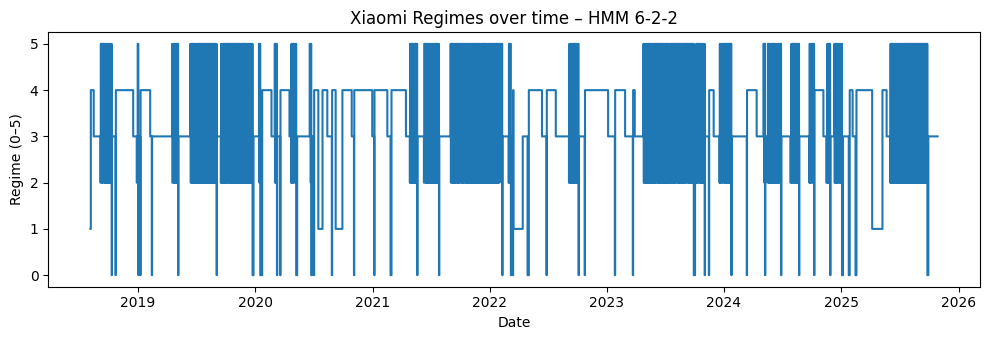

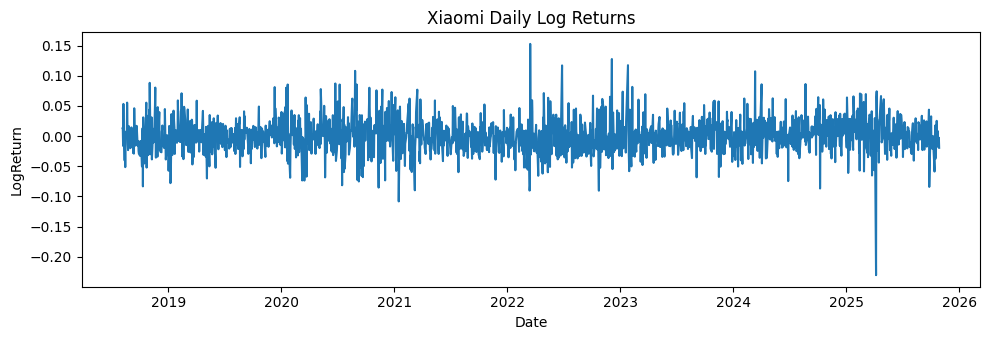

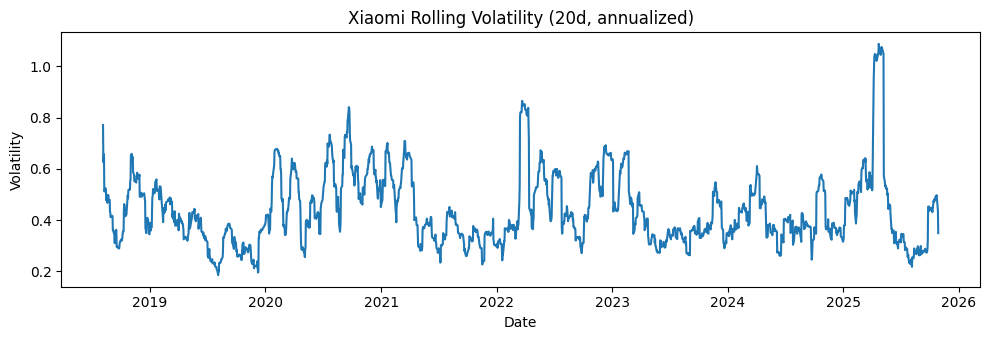

In [11]:
#Thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GMMHMM
from sklearn.preprocessing import StandardScaler
import os

# Load data
df = pd.read_csv(r'Xiaomi_clean.csv')
df.columns = [c.strip().replace(' ', '_') for c in df.columns]

date_col = 'Date' if 'Date' in df.columns else [c for c in df.columns if 'date' in c.lower()][0]
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df = df.dropna(subset=[date_col]).sort_values(date_col).reset_index(drop=True)

close_candidates = ['Adj_Close','AdjClose','Close','close','Price','price']
close_col = None
for c in df.columns:
    if c in close_candidates or c.lower() in ['close','adj close','adj_close','price']:
        close_col = c; break
if close_col is None:
    close_col = df.select_dtypes(include=[np.number]).columns[0]  # fallback nếu tên cột khác

# 2 feature: LogReturn & Volatility (20d, annualized)
df['LogReturn'] = np.log(df[close_col]).diff()
df['Volatility'] = df['LogReturn'].rolling(20).std() * np.sqrt(252)
df = df.dropna(subset=['LogReturn','Volatility']).reset_index(drop=True)
df.rename(columns={date_col: 'Date'}, inplace=True)

X_raw = df[['LogReturn','Volatility']].values
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)
lengths = [len(X)]

# HMM_6:2:2
model = GMMHMM(
    n_components=6,  
    n_mix=2,         
    covariance_type='diag',
    n_iter=200, tol=1e-3,
    random_state=42, verbose=False
)
model.fit(X, lengths)

# Dự đoán Regime
df['Regime'] = model.predict(X)

# Phân tích
print("Transition matrix (6x6):")
print(np.round(model.transmat_, 3))

# Means 
for s in range(model.n_components):
    print(f"\nState {s} mixture means (LogReturn, Volatility) in original units:")
    for m in range(model.n_mix):
        mu_scaled = model.means_[s][m]                
        mu_orig = scaler.inverse_transform(mu_scaled.reshape(1,-1)).ravel()
        print(f"  - mix {m}: [{mu_orig[0]:+.5f}, {mu_orig[1]:.4f}]")

# Tỷ trọng thời gian theo Regime
share = (df['Regime'].value_counts(normalize=True).sort_index()*100).round(2)
print("\nTime share per Regime (%):")
print(share)

# Vẽ biểu đồ
plt.figure(figsize=(10,3.5))
plt.plot(df['Date'], df['Regime'], drawstyle='steps-post')
plt.title('Xiaomi Regimes over time – HMM 6-2-2')
plt.xlabel('Date'); plt.ylabel('Regime (0–5)')
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,3.5))
plt.plot(df['Date'], df['LogReturn'])
plt.title('Xiaomi Daily Log Returns')
plt.xlabel('Date'); plt.ylabel('LogReturn')
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,3.5))
plt.plot(df['Date'], df['Volatility'])
plt.title('Xiaomi Rolling Volatility (20d, annualized)')
plt.xlabel('Date'); plt.ylabel('Volatility')
plt.tight_layout(); plt.show()

out_path = os.path.join(os.path.dirname(r'Xiaomi_clean.csv'), 'xiaomi_hmm622_regimes.csv')
df.to_csv(out_path, index=False)


HMM_712_Xiaomi

Degenerate mixture covariance


Transition matrix (7x7):
[[0.078 0.048 0.    0.    0.    0.001 0.873]
 [0.    0.    0.128 0.872 0.    0.    0.   ]
 [0.    0.001 0.    0.811 0.188 0.    0.   ]
 [0.    0.    0.946 0.    0.    0.    0.054]
 [0.    0.783 0.003 0.    0.    0.    0.214]
 [1.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.002 0.    0.    0.    0.826 0.172]]

Mixture means for feature = LogReturn (original units):
State 0: mix0=+0.011239, mix1=-0.013912
State 1: mix0=+0.036858, mix1=+0.007259
State 2: mix0=-0.008594, mix1=+0.024213
State 3: mix0=-0.008890, mix1=-0.230524
State 4: mix0=+0.051540, mix1=+0.127334
State 5: mix0=-0.007773, mix1=+0.001120
State 6: mix0=-0.001878, mix1=+0.006965

Time share per Regime (%):
Regime
0    21.79
1     2.61
2    14.06
3    14.06
4     2.61
5    21.79
6    23.07
Name: proportion, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_15600\1129922007.py:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu_scaled = float(model.means_[s][m])
C:\Users\Dell\AppData\Local\Temp\ipykernel_15600\1129922007.py:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu_scaled = float(model.means_[s][m])
C:\Users\Dell\AppData\Local\Temp\ipykernel_15600\1129922007.py:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu_scaled = float(model.means_[s][m])
C:\Users\Dell\Ap

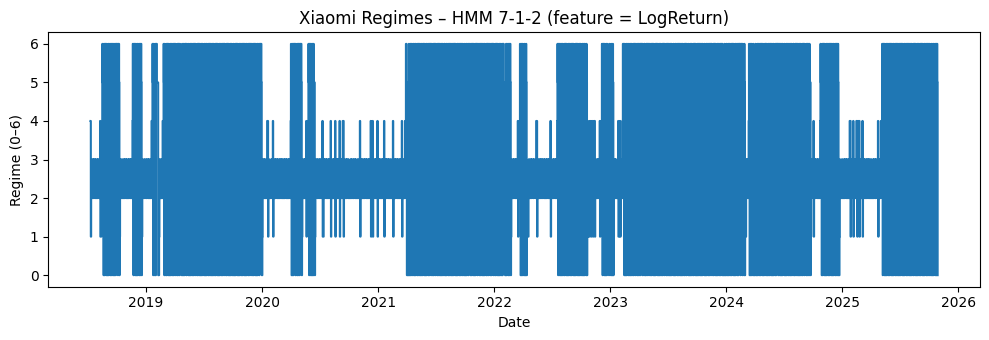

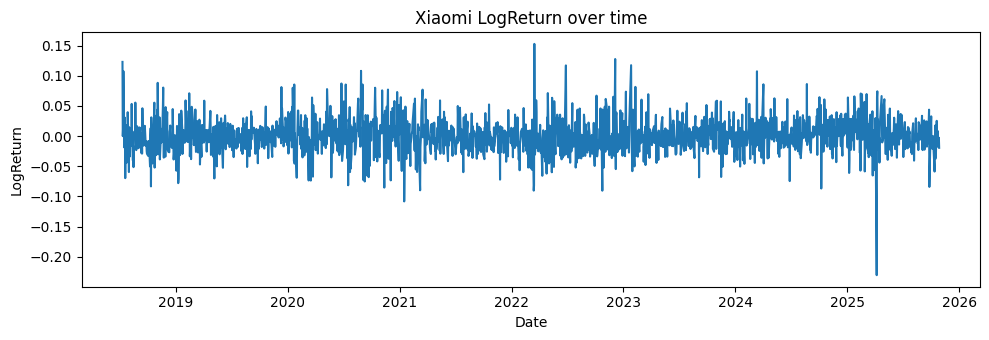

In [17]:
# Thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GMMHMM
from sklearn.preprocessing import StandardScaler
import os

# Load data
df = pd.read_csv(r'Xiaomi_clean.csv')
df.columns = [c.strip().replace(' ', '_') for c in df.columns]

date_col = 'Date' if 'Date' in df.columns else [c for c in df.columns if 'date' in c.lower()][0]
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df = df.dropna(subset=[date_col]).sort_values(date_col).reset_index(drop=True)

close_candidates = ['Adj_Close','AdjClose','Close','close','Price','price']
close_col = None
for c in df.columns:
    if c in close_candidates or c.lower() in ['close','adj close','adj_close','price']:
        close_col = c; break
if close_col is None:
    close_col = df.select_dtypes(include=[np.number]).columns[0]

# Tạo LogReturn + Volatility
df['LogReturn'] = np.log(df[close_col]).diff()
df['Volatility'] = df['LogReturn'].rolling(20).std() * np.sqrt(252)
df = df.dropna(subset=['LogReturn']).reset_index(drop=True)
df.rename(columns={date_col: 'Date'}, inplace=True)

# ==== CHỌN 1 FEATURE ====
feature_name = 'LogReturn'         

X_raw = df[[feature_name]].values
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)
lengths = [len(X)]

# HMM 7:1:2
model = GMMHMM(
    n_components=7,
    n_mix=2,
    covariance_type='diag',
    n_iter=300, tol=1e-3,
    random_state=42, verbose=False
)
model.fit(X, lengths)
df['Regime'] = model.predict(X)

# Phân tích
print("Transition matrix (7x7):")
print(np.round(model.transmat_, 3))

print(f"\nMixture means for feature = {feature_name} (original units):")
for s in range(model.n_components):
    vals = []
    for m in range(model.n_mix):
        mu_scaled = float(model.means_[s][m])
        mu_orig = scaler.inverse_transform([[mu_scaled]])[0,0]
        vals.append(mu_orig)
    print(f"State {s}: mix0={vals[0]:+.6f}, mix1={vals[1]:+.6f}")

share = (df['Regime'].value_counts(normalize=True).sort_index()*100).round(2)
print("\nTime share per Regime (%):")
print(share)

#Vẽ biểu đồ
plt.figure(figsize=(10,3.5))
plt.plot(df['Date'], df['Regime'], drawstyle='steps-post')
plt.title(f'Xiaomi Regimes – HMM 7-1-2 (feature = {feature_name})')
plt.xlabel('Date'); plt.ylabel('Regime (0–6)')
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,3.5))
plt.plot(df['Date'], df[feature_name])
plt.title(f'Xiaomi {feature_name} over time')
plt.xlabel('Date'); plt.ylabel(feature_name)
plt.tight_layout(); plt.show()

out_path = os.path.join(os.path.dirname(r'Xiaomi_clean.csv'), f'xiaomi_hmm712_{feature_name.lower()}_regimes.csv')
df.to_csv(out_path, index=False)
